In [1]:
import pandas as pd
import geopandas as gpd
import os
import urllib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#get gkpg data on San Fran school locations and gentification typologies
school_gentrification_codes = gpd.read_file("../../gda2021-project-brainstorm/data/school_gentrification.gpkg")
sanfran = gpd.read_file("../../gda2021-project-brainstorm/data/sanfrancisco.gpkg")

/srv/conda/envs/notebook/lib/python3.8/site-packages/geopandas/geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


In [3]:
#sanity check
school_gentrification_codes["LAT"]

0       37.77366814806908
1      37.775655649753844
2      37.792392032719135
3      37.798858158109795
4       37.83292447657965
              ...        
141     37.73471052819015
142     37.74654093736402
143     37.79454141236914
144     37.80724162609006
145     37.80039301024288
Name: LAT, Length: 146, dtype: object

In [49]:
sanfran

,GEOID,Typology,geometry
0,6.013303e+09,Stable Moderate/Mixed Income,"MULTIPOLYGON (((-121.71412 37.97147, -121.6960..."
1,6.013303e+09,Stable Moderate/Mixed Income,"MULTIPOLYGON (((-121.72346 37.96161, -121.7167..."
2,6.013303e+09,Stable Moderate/Mixed Income,"MULTIPOLYGON (((-121.74335 37.96151, -121.7324..."
3,6.013307e+09,At Risk of Gentrification,"MULTIPOLYGON (((-121.82220 37.99802, -121.8213..."
4,6.013321e+09,Stable Moderate/Mixed Income,"MULTIPOLYGON (((-122.12674 37.99154, -122.1202..."
...,...,...,...
2104,6.087122e+09,At Risk of Becoming Exclusive,"MULTIPOLYGON (((-121.93879 37.04581, -121.9380..."
2105,6.085512e+09,Stable Moderate/Mixed Income,"MULTIPOLYGON (((-121.82999 37.24749, -121.8234..."
2106,6.075025e+09,Becoming Exclusive,"MULTIPOLYGON (((-122.41055 37.74837, -122.4087..."
2107,6.085503e+09,At Risk of Becoming Exclusive,"MULTIPOLYGON (((-121.88069 37.29224, -121.8754..."


[(37.7, 37.9), (-122.4, -122.09)]

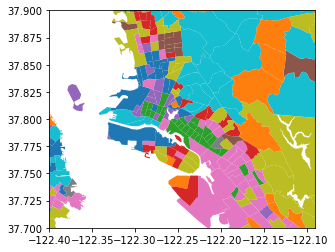

In [56]:
#plot Oakland by gentrification typologies
f, ax = plt.subplots()
sanfran.plot(ax=ax, column='Typology')
ax.set(ylim=(37.7,37.9), xlim=(-122.4,-122.09))

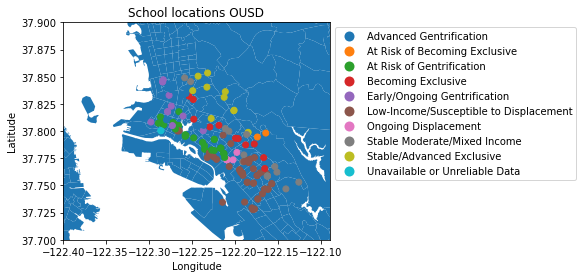

In [6]:
#plot school locations by gentrification typologies
%matplotlib inline

f, ax = plt.subplots()

sanfran.plot(ax=ax)
ax.set(ylim=(37.7,37.9), xlim=(-122.4,-122.09))
ax.set_title('School locations OUSD')
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')
#ax.set_xlim([-120, 40])
sgcplot = school_gentrification_codes.plot(ax=ax, column = 'Typology', legend=True)
leg = ax.get_legend()
leg.set_bbox_to_anchor((1,1))

In [7]:
#get OUSD demand data 
url = 'https://raw.githubusercontent.com/UW-GDA/Oakland-Gentrification-Ed-Analysis/main/data/ousd_demand_16-17.csv?token=ASMZOW2PBDDYIOBSKCRVBJDAKJI46'

In [8]:
sixsev_demand_df = pd.read_csv(url, error_bad_lines=False)

In [9]:
url2 ='https://raw.githubusercontent.com/UW-GDA/Oakland-Gentrification-Ed-Analysis/main/data/ousd_demand_17-18.csv?token=ASMZOWZSIT5RJKH7A2Q6UJLAKJMFA'

In [10]:
seveight_demand_df = pd.read_csv(url2, error_bad_lines=False)

In [11]:
url3 = 'https://raw.githubusercontent.com/UW-GDA/Oakland-Gentrification-Ed-Analysis/main/data/ousd_demand_18-19.csv?token=ASMZOW35O5WEONINPH6CZELAKJMJE'

In [12]:
eightnine_demand_df = pd.read_csv(url3, error_bad_lines=False) 

In [13]:
url4 = 'https://raw.githubusercontent.com/UW-GDA/Oakland-Gentrification-Ed-Analysis/main/data/ousd_demand_19-20.csv?token=ASMZOW4JBHVYL6DQSYZPHDTAKJMOW'
ninetwenty_demand_df = pd.read_csv(url4, error_bad_lines=False)

In [14]:
url5 = 'https://raw.githubusercontent.com/UW-GDA/Oakland-Gentrification-Ed-Analysis/main/data/ousd_demand_20-21.csv?token=ASMZOW7ONXXVMVATXCSKIS3AKJMR4'
twentyone_demand_df = pd.read_csv(url5, error_bad_lines=False)

In [15]:
#sanity check
twentyone_demand_df

,LATY DD offset,LONGX DD offset,sitename CDE,Demand,sitename CDE.1,Year
0,37.8142,-122.260,Westlake Middle,49.0%,Westlake Middle,2020-21
1,37.8090,-122.283,West Oakland Middle,52.0%,West Oakland Middle,2020-21
2,37.7821,-122.224,Urban Promise Academy,92.8%,Urban Promise Academy,2020-21
3,37.7844,-122.219,United for Success Academy,54.5%,United for Success Academy,2020-21
4,37.8362,-122.212,Thornhill Elementary,133.3%,Thornhill Elementary,2020-21
...,...,...,...,...,...,...
78,37.8001,-122.207,Bret Harte Middle,46.9%,Bret Harte Middle,2020-21
79,37.8005,-122.237,Bella Vista Elementary,63.5%,Bella Vista Elementary,2020-21
80,NaN,NaN,Alliance Academy,NaN,Alliance Academy,2020-21
81,37.7886,-122.205,Allendale Elementary,44.6%,Allendale Elementary,2020-21


In [16]:
#Merge the demand data into one dataframe
demand_total = sixsev_demand_df

In [17]:
demand_total['Demand_16_17'] = sixsev_demand_df['Demand']
demand_total['Demand_17_18'] = seveight_demand_df['Demand']
demand_total['Demand_18_19'] = eightnine_demand_df['Demand']
demand_total['Demand_19_20'] = ninetwenty_demand_df['Demand']
demand_total['Demand_20_21'] = twentyone_demand_df['Demand']

In [18]:
demand_total

,LATY DD offset,LONGX DD offset,sitename CDE,Demand,sitename CDE.1,Year,Demand_16_17,Demand_17_18,Demand_18_19,Demand_19_20,Demand_20_21
0,37.8142,-122.260,Westlake Middle,73.4%,Westlake Middle,2016-17,73.4%,56.8%,67.1%,52.6%,49.0%
1,37.8090,-122.283,West Oakland Middle,97.5%,West Oakland Middle,2016-17,97.5%,69.9%,76.8%,75.9%,52.0%
2,37.7821,-122.224,Urban Promise Academy,92.9%,Urban Promise Academy,2016-17,92.9%,80.0%,104.0%,124.6%,92.8%
3,37.7844,-122.219,United for Success Academy,47.7%,United for Success Academy,2016-17,47.7%,38.8%,39.1%,62.6%,54.5%
4,37.8362,-122.212,Thornhill Elementary,111.8%,Thornhill Elementary,2016-17,111.8%,124.2%,122.9%,119.6%,133.3%
...,...,...,...,...,...,...,...,...,...,...,...
78,37.8001,-122.207,Bret Harte Middle,58.1%,Bret Harte Middle,2016-17,58.1%,44.4%,52.1%,44.2%,46.9%
79,37.8005,-122.237,Bella Vista Elementary,31.8%,Bella Vista Elementary,2016-17,31.8%,24.1%,38.5%,37.6%,63.5%
80,NaN,NaN,Alliance Academy,54.8%,Alliance Academy,2016-17,54.8%,58.2%,77.1%,NaN,NaN
81,37.7886,-122.205,Allendale Elementary,19.7%,Allendale Elementary,2016-17,19.7%,31.1%,42.3%,38.9%,44.6%


In [19]:
#turn it into a gdf
demand_total = demand_total.rename(columns={'LATY DD offset':'lat', 'LONGX DD offset':'lon', 'sitename CDE':'school_name'})

In [20]:
demand_gdf = gpd.GeoDataFrame(demand_total, geometry=gpd.points_from_xy(demand_total['lon'], demand_total['lat']))

In [21]:
demand_gdf

,lat,lon,school_name,Demand,sitename CDE.1,Year,Demand_16_17,Demand_17_18,Demand_18_19,Demand_19_20,Demand_20_21,geometry
0,37.8142,-122.260,Westlake Middle,73.4%,Westlake Middle,2016-17,73.4%,56.8%,67.1%,52.6%,49.0%,POINT (-122.26000 37.81420)
1,37.8090,-122.283,West Oakland Middle,97.5%,West Oakland Middle,2016-17,97.5%,69.9%,76.8%,75.9%,52.0%,POINT (-122.28300 37.80900)
2,37.7821,-122.224,Urban Promise Academy,92.9%,Urban Promise Academy,2016-17,92.9%,80.0%,104.0%,124.6%,92.8%,POINT (-122.22400 37.78210)
3,37.7844,-122.219,United for Success Academy,47.7%,United for Success Academy,2016-17,47.7%,38.8%,39.1%,62.6%,54.5%,POINT (-122.21900 37.78440)
4,37.8362,-122.212,Thornhill Elementary,111.8%,Thornhill Elementary,2016-17,111.8%,124.2%,122.9%,119.6%,133.3%,POINT (-122.21200 37.83620)
...,...,...,...,...,...,...,...,...,...,...,...,...
78,37.8001,-122.207,Bret Harte Middle,58.1%,Bret Harte Middle,2016-17,58.1%,44.4%,52.1%,44.2%,46.9%,POINT (-122.20700 37.80010)
79,37.8005,-122.237,Bella Vista Elementary,31.8%,Bella Vista Elementary,2016-17,31.8%,24.1%,38.5%,37.6%,63.5%,POINT (-122.23700 37.80050)
80,NaN,NaN,Alliance Academy,54.8%,Alliance Academy,2016-17,54.8%,58.2%,77.1%,NaN,NaN,POINT (nan nan)
81,37.7886,-122.205,Allendale Elementary,19.7%,Allendale Elementary,2016-17,19.7%,31.1%,42.3%,38.9%,44.6%,POINT (-122.20500 37.78860)


In [57]:
#get erollment data from upload and join to one table
enrollment_15_16 = pd.read_csv('../../Oakland-Gentrification-Ed-Analysis/data/enroll_15_16.csv', index_col=0)
enrollment_16_17 = pd.read_csv('../../Oakland-Gentrification-Ed-Analysis/data/enroll_16_17.csv', index_col=0)
enrollment_17_18 = pd.read_csv('../../Oakland-Gentrification-Ed-Analysis/data/enroll_17_18.csv', index_col=0)
enrollment_18_19 = pd.read_csv('../../Oakland-Gentrification-Ed-Analysis/data/enroll_18_19.csv', index_col=0)
enrollment_19_20 = pd.read_csv('../../Oakland-Gentrification-Ed-Analysis/data/enroll_19_20.csv', index_col=0)
#enrollment_16_17.tail(10)

In [58]:
se_join = enrollment_15_16.join(enrollment_16_17, how='outer').join(enrollment_17_18, how='outer').join(enrollment_18_19, how='outer').join(enrollment_19_20, how='outer')
se_join

,Enrolled_15_16,Enrolled_16_17,Enrolled_17_18,Enrolled_18_19,Enrolled_19_20
school_name,,,,,
ACORN Woodland,292,298,300,286,281
ASCEND,444,461,487,486,494
Achieve Academy,746,719,675,638,650
Allendale,374,371,361,401,400
Alliance Academy,371,328,358,287,NaN
...,...,...,...,...,...
Urban Promise Academy,371,370,372,370,375
Vincent Academy,271,288,266,242,217
West Oakland Middle School,198,179,202,199,198


In [25]:
#manipulate data to try and join the enrollment data with the typology data but eventually realized this would not work
#because the school names were different between data sets
se_join.index = se_join.index.str.lower()

school_gentrification_codes['SCHOOL'] = school_gentrification_codes['SCHOOL'].str.lower()

school_gentrification_codes.sort_values('SCHOOL')

se_join

,Enrolled_15_16,Enrolled_16_17,Enrolled_17_18,Enrolled_18_19,Enrolled_19_20
school_name,,,,,
acorn woodland,292,298,300,286,281
ascend,444,461,487,486,494
achieve academy,746,719,675,638,650
allendale,374,371,361,401,400
alliance academy,371,328,358,287,NaN
...,...,...,...,...,...
urban promise academy,371,370,372,370,375
vincent academy,271,288,266,242,217
west oakland middle school,198,179,202,199,198


In [26]:
se_join.sort_values('school_name')

,Enrolled_15_16,Enrolled_16_17,Enrolled_17_18,Enrolled_18_19,Enrolled_19_20
school_name,,,,,
achieve academy,746,719,675,638,650
acorn woodland,292,298,300,286,281
allendale,374,371,361,401,400
alliance academy,371,328,358,287,NaN
alternatives in action,165,171,183,202,171
...,...,...,...,...,...
urban promise academy,371,370,372,370,375
vincent academy,271,288,266,242,217
west oakland middle school,198,179,202,199,198


In [27]:
school_gentrification_codes.rename(columns={"SCHOOL":"school_name"})
school_gentrification_codes = school_gentrification_codes.drop(['index_right'], axis=1)
school_gentrification_codes

,TYPE,SCHOOL,PHONE,ADDRESS,LAT,LON,GEOID,Typology,geometry
0,High,media college prep,(510) 879-1597,"4610 Foothill Blvd\nOakland, CA\n(37.773668148...",37.77366814806908,-122.20956950172047,6.001408e+09,Ongoing Displacement,POINT (-122.20957 37.77367)
1,Elementary,lazear elementary,(510) 879-1320,"824 29th Ave\nOakland, CA\n(37.775655649753844...",37.775655649753844,-122.23254717956905,6.001406e+09,Low-Income/Susceptible to Displacement,POINT (-122.23255 37.77566)
2,Elementary,manzanita community school,(510) 879-1370,"2409 E 27th St.\nOakland, CA\n(37.792392032719...",37.792392032719135,-122.22428241011983,6.001406e+09,At Risk of Gentrification,POINT (-122.22428 37.79239)
3,Charter,conservatory of instrumental and vocal arts (c...,(510) 285-7511,"3800 Mountain Blvd.\nOakland, CA\n(37.79885815...",37.798858158109795,-122.18487411879585,6.001408e+09,Stable/Advanced Exclusive,POINT (-122.18487 37.79886)
4,Charter,north oakland community charter school (k-5),(510) 655-0540,"1000 42nd St.\nOakland, CA\n(37.83292447657965...",37.83292447657965,-122.27690174205412,6.001401e+09,Early/Ongoing Gentrification,POINT (-122.27690 37.83292)
...,...,...,...,...,...,...,...,...,...
141,Elementary,brookfield village elementary,(510) 879-1030,"401 Jones Ave\nOakland, CA\n(37.73471052819015...",37.73471052819015,-122.18898630297923,6.001409e+09,Low-Income/Susceptible to Displacement,POINT (-122.18899 37.73471)
142,Charter,education for change at cox elementary (k-5),(510) 904-6300,"9860 Sunnyside St\nOakland, CA\n(37.7465409373...",37.74654093736402,-122.16182411545786,6.001410e+09,Low-Income/Susceptible to Displacement,POINT (-122.16182 37.74654)
143,Elementary,carl munck elementary,(510) 879-1680,"11900 Campus Dr\nOakland, CA\n(37.794541412369...",37.79454141236914,-122.1741811798675,6.001408e+09,At Risk of Becoming Exclusive,POINT (-122.17418 37.79454)
144,Middle,cole middle school,(510) 879-1091,"1011 Union St\nOakland, CA\n(37.80724162609006...",37.80724162609006,-122.28937708587051,6.001410e+09,At Risk of Gentrification,POINT (-122.28938 37.80724)


In [28]:
#merged_data = pd.merge(left=school_gentrification_codes, right=school_enrollment, left_on='school_name', right_on='school_name', how='left')
#school_gentrification_codes
#join(school_enrollment, lsuffix='school_name', rsuffix='Enrollment_19_20')

In [29]:
#get updated enrollment data with lat and lon tacked on from excel manipulation and turn into gdf
enrollment_data = pd.read_csv('../../Oakland-Gentrification-Ed-Analysis/data/enrollment_with_typology.csv', thousands=',')

In [30]:
enrollment = enrollment_data.rename(columns={'LATY DD offset':'lat', 'LONGX DD offset':'lon'})

In [31]:
enrollment_gdf = gpd.GeoDataFrame(enrollment, geometry=gpd.points_from_xy(enrollment['lon'], enrollment['lat']))
enrollment_gdf = enrollment_gdf.set_crs("EPSG:4326")


EPSG:4326


In [32]:
#sanity check
enrollment_gdf

,lat,lon,school_name,SCHOOL,Typology,Enrollment_15_16,Enrollment_16_17,Enrollment_17_18,Enrollment_18_19,Enrollment_19_20,mean_enrollment,max_enrollment,geometry
0,37.7532,-122.186,ACORN Woodland Elementary,ACORN WOODLAND ELEMENTARY,Low-Income/Susceptible to Displacement,292,298,300,286,281.0,291.4,300,POINT (-122.18600 37.75320)
1,37.7886,-122.205,Allendale Elementary,ALLENDALE ELEMENTARY,Low-Income/Susceptible to Displacement,374,371,361,401,400.0,381.4,401,POINT (-122.20500 37.78860)
2,NaN,NaN,Alliance Academy,ALLIANCE ACADEMY,Low-Income/Susceptible to Displacement,371,328,358,287,NaN,268.8,371,POINT (nan nan)
3,37.8005,-122.237,Bella Vista Elementary,BELLA VISTA ELEMENTARY,Early/Ongoing Gentrification,462,457,447,469,468.0,460.6,469,POINT (-122.23700 37.80050)
4,37.8001,-122.207,Bret Harte Middle,BRET HARTE MIDDLE SCHOOL,Stable Moderate/Mixed Income,484,500,591,556,674.0,561.0,674,POINT (-122.20700 37.80010)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,37.7804,-122.232,Thornhill Elementary,THORNHILL ELEMENTARY,Stable/Advanced Exclusive,394,391,390,410,401.0,397.2,410,POINT (-122.23200 37.78040)
72,37.8362,-122.212,United for Success Academy,UNITED FOR SUCCESS ACADEMY,At Risk of Gentrification,382,349,359,370,375.0,367.0,382,POINT (-122.21200 37.83620)
73,37.7844,-122.219,Urban Promise Academy,URBAN PROMISE ACADEMY,At Risk of Gentrification,371,370,372,370,375.0,371.6,375,POINT (-122.21900 37.78440)
74,37.7821,-122.224,West Oakland Middle,WEST OAKLAND MIDDLE SCHOOL,At Risk of Gentrification,198,179,202,199,198.0,195.2,202,POINT (-122.22400 37.78210)


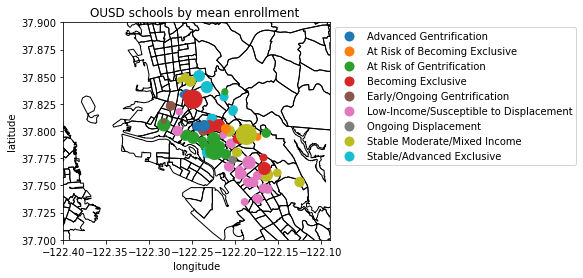

In [59]:
#plot average enrollment
f, ax = plt.subplots()

sanfran.plot(ax=ax, facecolor='none', edgecolor='k')
ax.set(ylim=(37.7,37.9), xlim=(-122.4,-122.09))
enrollment_gdf.plot(ax=ax, column='Typology', markersize=(enrollment_gdf['mean_enrollment']/5), legend= True)
plt.xlabel('longitude')
plt.ylabel('latitude')
ax.set_title('OUSD schools by mean enrollment ')
#plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='School size')
leg = ax.get_legend()
leg.set_bbox_to_anchor((1,1))

In [34]:
#convert enrollment data to integers because it was previously strings for some reason
enrollment_gdf['Enrollment_15_16'] = pd.to_numeric(enrollment_gdf['Enrollment_15_16'])
enrollment_gdf['Enrollment_16_17'] = pd.to_numeric(enrollment_gdf['Enrollment_16_17'])
enrollment_gdf['Enrollment_17_18'] = pd.to_numeric(enrollment_gdf['Enrollment_17_18'])
enrollment_gdf['Enrollment_18_19'] = pd.to_numeric(enrollment_gdf['Enrollment_18_19'])
enrollment_gdf['mean_enrollment'] = pd.to_numeric(enrollment_gdf['Enrollment_18_19'])

In [35]:
#compute percent change and average percent change in enrollment for 5 year period
enrollment_gdf['percent_change'] = (((enrollment_gdf['Enrollment_19_20']-enrollment_gdf['Enrollment_15_16'])/enrollment_gdf['Enrollment_15_16'])*100)
enrollment_gdf['percent_change_mean'] = (((enrollment_gdf['mean_enrollment']-enrollment_gdf['Enrollment_15_16'])/enrollment_gdf['Enrollment_15_16'])*100)
enrollment_gdf.sort_values('percent_change_mean')

,lat,lon,school_name,SCHOOL,Typology,Enrollment_15_16,Enrollment_16_17,Enrollment_17_18,Enrollment_18_19,Enrollment_19_20,mean_enrollment,max_enrollment,geometry,percent_change,percent_change_mean
69,37.7982,-122.164,Street Academy (Alternative),STREET ACADEMY,At Risk of Gentrification,193,100,108,107,97.0,107,193,POINT (-122.16400 37.79820),-49.740933,-44.559585
6,37.7348,-122.189,Brookfield Elementary,BROOKFIELD VILLAGE ELEMENTARY,Low-Income/Susceptible to Displacement,362,322,296,232,216.0,232,362,POINT (-122.18900 37.73480),-40.331492,-35.911602
61,37.8083,-122.298,Prescott,NaN,NaN,233,207,181,151,121.0,151,233,POINT (-122.29800 37.80830),-48.068670,-35.193133
75,37.8090,-122.283,Westlake Middle,WESTLAKE MIDDLE SCHOOL,Early/Ongoing Gentrification,455,383,360,307,312.0,307,455,POINT (-122.28300 37.80900),-31.428571,-32.527473
23,37.7382,-122.175,Fred T. Korematsu Discovery Academy,FRED T. KOREMATSU DISCOVERY ACADEMY,Low-Income/Susceptible to Displacement,413,391,339,295,245.0,295,413,POINT (-122.17500 37.73820),-40.677966,-28.571429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40,37.7929,-122.197,Laurel Elementary,LAUREL ELEMENTARY,Becoming Exclusive,214,518,510,475,481.0,475,518,POINT (-122.19700 37.79290),124.766355,121.962617
62,37.7467,-122.162,Reach Academy,REACH ACADEMY,Low-Income/Susceptible to Displacement,75,384,397,383,406.0,383,406,POINT (-122.16200 37.74670),441.333333,410.666667
29,37.8053,-122.219,Glenview Elementary,GLENVIEW ELEMENTARY,Becoming Exclusive,90,439,455,465,461.0,465,465,POINT (-122.21900 37.80530),412.222222,416.666667
14,37.7605,-122.192,Community United Elementary,COMMUNITY UNITED ELEMENTARY SCHOOL,Low-Income/Susceptible to Displacement,18,388,367,351,23.0,351,388,POINT (-122.19200 37.76050),27.777778,1850.000000


In [37]:
#create list and array of average mean change to compare to non average change
percentchangelist = enrollment_gdf['percent_change_mean'].tolist()
perarr = np.array(percentchangelist)

(array([ 1.,  5.,  5., 29., 21.,  6.,  0.,  2.,  0.,  1.,  0.,  0.,  1.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,
         0.]),
 array([-50. , -37.5, -25. , -12.5,   0. ,  12.5,  25. ,  37.5,  50. ,
         62.5,  75. ,  87.5, 100. , 112.5, 125. , 137.5, 150. , 162.5,
        175. , 187.5, 200. , 212.5, 225. , 237.5, 250. , 262.5, 275. ,
        287.5, 300. , 312.5, 325. , 337.5, 350. , 362.5, 375. , 387.5,
        400. , 412.5, 425. , 437.5, 450. ]),
 <BarContainer object of 40 artists>)

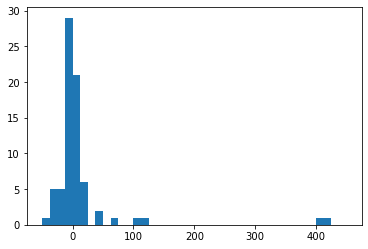

In [61]:
plt.hist(perarr, bins=40, range=[-50, 450])

(array([ 4.,  2.,  9., 19., 22.,  6.,  3.,  2.,  1.,  1.,  1.,  1.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         1.]),
 array([-50. , -37.5, -25. , -12.5,   0. ,  12.5,  25. ,  37.5,  50. ,
         62.5,  75. ,  87.5, 100. , 112.5, 125. , 137.5, 150. , 162.5,
        175. , 187.5, 200. , 212.5, 225. , 237.5, 250. , 262.5, 275. ,
        287.5, 300. , 312.5, 325. , 337.5, 350. , 362.5, 375. , 387.5,
        400. , 412.5, 425. , 437.5, 450. ]),
 <BarContainer object of 40 artists>)

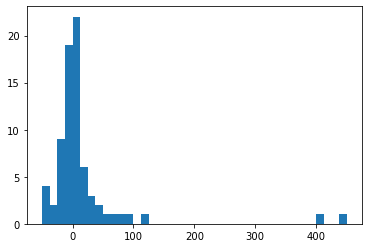

In [62]:
percentchangelist2 = enrollment_gdf['percent_change'].tolist()
perarr2 = np.array(percentchangelist2)
plt.hist(perarr2, bins=40, range=[-50, 450])

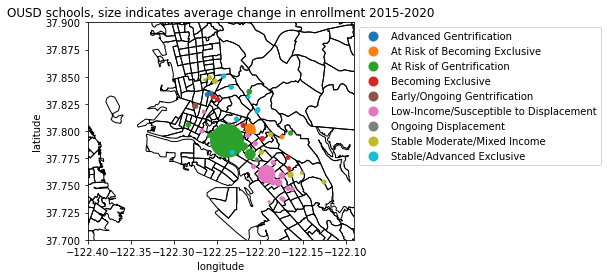

In [63]:
#plot schools with size indicator for average enrollment change. only positive values

f, ax = plt.subplots()
sanfran.plot(ax=ax, facecolor='none', edgecolor='k')
ax.set(ylim=(37.7,37.9), xlim=(-122.4,-122.09))
enrollment_gdf.plot(ax=ax, column='Typology', markersize=((enrollment_gdf['percent_change_mean']+44.6)**.75), legend= True)
plt.xlabel('longitude')
plt.ylabel('latitude')
ax.set_title('OUSD schools, size indicates average change in enrollment 2015-2020')
leg = ax.get_legend()
leg.set_bbox_to_anchor((1,1))

In [39]:
#create columns with boolean values for whether enrollment went up or down year to year

change1 = pd.DataFrame()
change1['school'] = enrollment_gdf['SCHOOL']
change1['typology'] = enrollment_gdf['Typology']
change1['lat'] = enrollment_gdf['lat']
change1['lon'] = enrollment_gdf['lon']
change1['change_enroll1'] = (enrollment_gdf['Enrollment_15_16']>=enrollment_gdf['Enrollment_16_17'])
change1['change_enroll2'] = (enrollment_gdf['Enrollment_16_17']>=enrollment_gdf['Enrollment_17_18'])
change1['change_enroll3'] = (enrollment_gdf['Enrollment_17_18']>=enrollment_gdf['Enrollment_18_19'])
change1['change_enroll4'] = (enrollment_gdf['Enrollment_18_19']>=enrollment_gdf['Enrollment_19_20'])
change1['percent_change'] = (enrollment_gdf['Enrollment_19_20']-enrollment_gdf['Enrollment_15_16'])

In [41]:
change1_gdf = gpd.GeoDataFrame(change1, geometry=gpd.points_from_xy(change1['lon'], change1['lat']))

In [42]:
change1_gdf

,school,typology,lat,lon,change_enroll1,change_enroll2,change_enroll3,change_enroll4,percent_change,geometry
0,ACORN WOODLAND ELEMENTARY,Low-Income/Susceptible to Displacement,37.7532,-122.186,False,False,True,True,-11.0,POINT (-122.18600 37.75320)
1,ALLENDALE ELEMENTARY,Low-Income/Susceptible to Displacement,37.7886,-122.205,True,True,False,True,26.0,POINT (-122.20500 37.78860)
2,ALLIANCE ACADEMY,Low-Income/Susceptible to Displacement,NaN,NaN,True,False,True,False,NaN,POINT (nan nan)
3,BELLA VISTA ELEMENTARY,Early/Ongoing Gentrification,37.8005,-122.237,True,True,False,True,6.0,POINT (-122.23700 37.80050)
4,BRET HARTE MIDDLE SCHOOL,Stable Moderate/Mixed Income,37.8001,-122.207,False,False,True,False,190.0,POINT (-122.20700 37.80010)
...,...,...,...,...,...,...,...,...,...,...
71,THORNHILL ELEMENTARY,Stable/Advanced Exclusive,37.7804,-122.232,True,True,False,True,7.0,POINT (-122.23200 37.78040)
72,UNITED FOR SUCCESS ACADEMY,At Risk of Gentrification,37.8362,-122.212,True,False,False,False,-7.0,POINT (-122.21200 37.83620)
73,URBAN PROMISE ACADEMY,At Risk of Gentrification,37.7844,-122.219,True,False,True,False,4.0,POINT (-122.21900 37.78440)
74,WEST OAKLAND MIDDLE SCHOOL,At Risk of Gentrification,37.7821,-122.224,True,False,True,True,0.0,POINT (-122.22400 37.78210)


<ipython-input-43-db2576a3fb28>:6: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend([True, False], labels=['Increase', 'Decrease'])


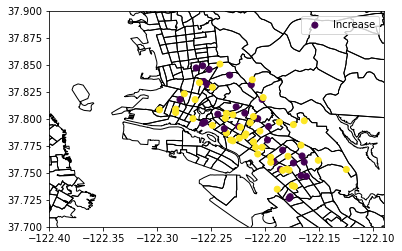

In [43]:
#plot each year with true/false representing increase or decrease in enrollment

f, ax = plt.subplots()

sanfran.plot(ax=ax, facecolor='none', edgecolor='k')
ax.set(ylim=(37.7,37.9), xlim=(-122.4,-122.09))
change1_plot = change1_gdf.plot(ax=ax, column='change_enroll1')
ax.legend([True, False], labels=['Increase', 'Decrease'])
#leg = ax.get_legend([True, False], labels=['Increase', 'Decrease'])
#leg.set_bbox_to_anchor((1,1))

<ipython-input-44-fa76e625e16d>:6: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend([True, False], labels=['Increase', 'Decrease'])


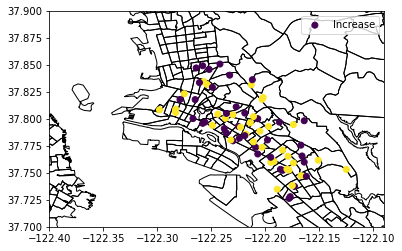

In [44]:
f, ax = plt.subplots()

sanfran.plot(ax=ax, facecolor='none', edgecolor='k')
ax.set(ylim=(37.7,37.9), xlim=(-122.4,-122.09))
change2_plot = change1_gdf.plot(ax=ax, column='change_enroll2')
ax.legend([True, False], labels=['Increase', 'Decrease'])
#leg = ax.get_legend([True, False], labels=['Increase', 'Decrease'])

<ipython-input-45-8f0c58e1ab7c>:6: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend([True, False], labels=['Increase', 'Decrease'])


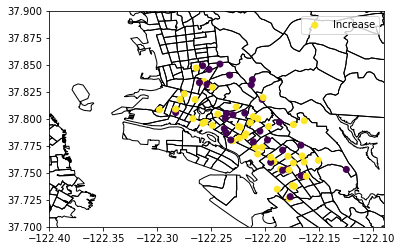

In [45]:
f, ax = plt.subplots()

sanfran.plot(ax=ax, facecolor='none', edgecolor='k')
ax.set(ylim=(37.7,37.9), xlim=(-122.4,-122.09))
change3_plot = change1_gdf.plot(ax=ax, column='change_enroll3')
ax.legend([True, False], labels=['Increase', 'Decrease'])
#leg = ax.get_legend([True, False], labels=['Increase', 'Decrease'])

<ipython-input-46-d2410687c61a>:6: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend([True, False], labels=['Increase', 'Decrease'])


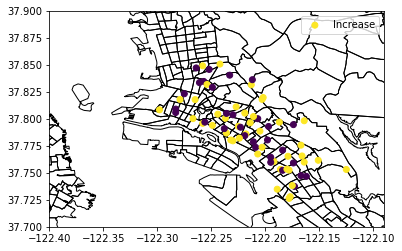

In [46]:
f, ax = plt.subplots()

sanfran.plot(ax=ax, facecolor='none', edgecolor='k')
ax.set(ylim=(37.7,37.9), xlim=(-122.4,-122.09))
change4_plot = change1_gdf.plot(ax=ax, column='change_enroll4')
ax.legend([True, False], labels=['Increase', 'Decrease'])
#leg = ax.get_legend([True, False], labels=['Increase', 'Decrease'])
